# Regressão linear

__Pacotes utilizados__

* `pandas`: para criação e manipulação de banco de dados
* `numpy`: para trabalhar com algebra linear
* `matplotlib`: para plotar gráficos
* `train_test_split`: para selecionar parte do dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
np.random.seed(42) # para manter os mesmos resultados

__Criar uma classe para regressão linear__

Parâmetros $\theta_{0}$ e $\theta_{1}$ Estimados de forma analítica atravéz do cálculo matricial (MMQ)

Equação normal:

\begin{equation}
{\hat{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T {y}
\end{equation}


In [0]:
class Regr_lin(object):

  def __init__(self):
    pass

  def fit(self, X_train, y_train):
    """
    Função para ajustar um modelo de regressão linear
    de forma analítica

    Input:
    X_train = matriz com variáveis independentes (features)
    y_train = vetor com variável dependente (target)
    
    Output:
    theta_hat = vetor com os parâmetros theta
    intercept = Coeficinete linear da função
    coef = coeficiente angular da função
    """
    # formatar os dados para cáculo matricial 
    if len(X_train.shape) < 2:
      X_train = X_train.reshape(-1, 1)

    # Adiciona uma coluna no vetor de features para o intercept
    X = np.insert(X_train, 0, 1, 1)

    # estima o theta_hat = (X^T * X)^-1 * X^T * y
    theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)

    self.theta_hat = theta_hat
    self.intercept = self.theta_hat[0]
    self.coef = self.theta_hat[1:]

  def predict(self, X_):
    """
    Função para calcular os valores preditos da função linear

    Input:
    X_ = matriz com variáveis independentes (features)
    
    Output:
    y_pred = valores preditos da função linear
    """
    # formatar os dados para cáculo matricial 
    if len(X_.shape) < 2:
      X_ = X_.reshape(-1, 1)

    # Adiciona uma coluna no vetor de features para o intercept
    X = np.insert(X_, 0, 1, 1)

    # produto vetorial de X e theta_hat
    y_pred = np.dot(X, self.theta_hat)
    return y_pred

__Criando dados para o ajuste do modelo__

In [0]:
dados = pd.DataFrame()
dados['x'] = np.linspace(-10, 10, 100)
dados['y'] = 4 + 2*dados.x + np.random.normal(0, 3, 100)

__Visualizando o modelo__

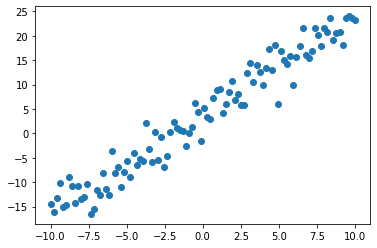

In [4]:
plt.scatter(y=dados.y, x=dados.x);

__Separar dados de treino e de teste__

In [0]:
X = np.array(dados.x)
y = np.array(dados.y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

__Instanciar e ajustar o modelo__

In [0]:
rl = Regr_lin()
rl.fit(X_train, y_train)

__Parâmetros do modelo__

In [7]:
print('Coeficiente linear (theta0): ', rl.intercept)
print('Coeficiente Angular (theta1): ', rl.coef[0])

Coeficiente linear (theta0):  3.7686949515092776
Coeficiente Angular (theta1):  2.017204983357533


__Visualizar o ajuste do modelo__

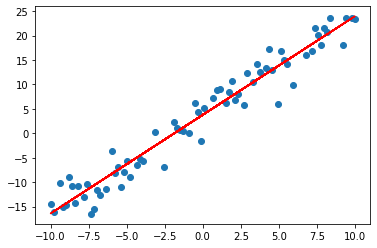

In [8]:
plt.scatter(X_train, y_train)
plt.plot(X_train, rl.predict(X_train), c='r');

__Avaliação do modelo__

Viés - erro do modelo

In [0]:
y_hat_vi = rl.predict(X_train)

print('Erro absoluto médio', np.absolute((y_hat_vi - y_train)).mean())
print('Erro quadrático médio', ((y_hat_vi - y_train)**2).mean())

Erro absoluto médio 2.123840987176964
Erro quadrático médio 7.453582599110228


Variância - erro de generalização

In [0]:
y_hat_va = rl.predict(X_test)

print('Erro absoluto médio', np.absolute((y_hat_va - y_test)).mean())
print('Erro quadrático médio', ((y_hat_va - y_test)**2).mean())

Erro absoluto médio 2.2022585971701507
Erro quadrático médio 7.0782839253488685


# Regressão linear com Gradient Descent

__Pacotes utilizados__

* `pandas`: para criação e manipulação de banco de dados
* `numpy`: para trabalhar com algebra linear
* `matplotlib`: para plotar gráficos
* `train_test_split`: para selecionar parte do dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
np.random.seed(42) # para manter os mesmos resultados

__Criar uma classe para regrassão linear__


Hipótese:
\begin{equation}
h_{\theta}(x)=\theta_{0} + \theta_{1}x_{1}
\end{equation}

\begin{equation}
h_{\theta}(x)=\sum_{j=0}^{n}\theta_{j}x_{j} = \theta^{T}x
\end{equation}


Função custo:

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}
\end{equation}

Batch Gradient Descent:

\begin{equation}
\theta_{(t+1)} = \theta_{(t)} - \eta \nabla J(\theta)
\end{equation}


Onde:

$\theta_{(t+1)}$: Parâmetro atualizado

$\theta_{(t)}$: Parâmetro atual

$\eta$: Taxa de aprendizado (Learning Rate)

$\nabla J(\theta)$: Gradiente

Derivada parcial da função custo (gradiente):

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}
\end{equation}

Vetor do gradiente da funcão de custo:

\begin{equation}
\nabla _{\theta}J(\theta)=\begin{pmatrix}
\dfrac{\partial}{\partial \theta_{0}}J(\theta)\\
\dfrac{\partial}{\partial \theta_{1}}J(\theta)\\
\vdots\\\
\dfrac{\partial}{\partial \theta_{n}}J(\theta)
\end{pmatrix}=\frac{1}{m}\mathbf{X}^{T}(\mathbf{X}\theta - y)
\end{equation}



Algoritmo:
1. Inicia com um valor aleatório para o $\theta$
2. computa a média dos gradientes
3. Ajusta o $\theta$ na direção correta (*$\eta$)
4. Repita até o critério de parada (convergir)



In [0]:
# implementa a regressão linear com Batch Gradient Descent
class Regr_lin_BGD(object):

  def __init__(self, taxa_aprendizado=0.0005, n_iteracoes=30):
    self.taxa_aprendizado = taxa_aprendizado
    self.n_iteracoes = n_iteracoes

  def fit(self, X_train, y_train):
    """
    Função para ajustar um modelo de regressão linear
    de forma numérica 

    Batch Gradient Descent

    Input:
    X_train = matriz com variáveis independentes (features)
    y_train = vetor com variável dependente (target)
    
    Output:
    theta_hat = vetor com os parâmetros theta
    intercept = Coeficinete linear da função
    coef = coeficiente angular da função
    """
    # formatar os dados para cáculo matricial 
    if len(X_train.shape) < 2:
      X_train = X_train.reshape(-1, 1)

    # Adiciona uma coluna no vetor de features para o intercept
    X = np.insert(X_train, 0, 1, 1)

    # inicia os parâmetros com pequenos valores aleatórios
    self.theta_hat = np.random.normal(0, 5, size = X[0].shape)

    # Função custo
    self.custo = []

    # início da iteração - BGD
    for _ in range(self.n_iteracoes):

      # inicia o gradiente com um vetor de zeros
      grad = np.zeros(self.theta_hat.shape) 

      # Calcula o gradiente para cada parametro
      for ponto, yi in zip(X, y_train):
        grad += (ponto * self.theta_hat - yi) * ponto

      # multiplica o gradiente pela taxa de apendizado
      grad *= self.taxa_aprendizado

      # atualiza os parâmetros
      self.theta_hat -= grad
      self.coef = self.theta_hat[1:]
      self.intercept = self.theta_hat[0]
      self.custo.append(((y_train - self.predict(X_train)) ** 2).sum())

  def predict(self, X_):
    """
    Função para calcular os valores preditos da função linear

    Input:
    X_ = matriz com variáveis independentes (features)
    
    Output:
    y_pred = valores preditos da função linear
    """
    # formatar os dados para cáculo matricial 
    if len(X_.shape) < 2:
      X_ = X_.reshape(-1, 1)

    # Adiciona uma coluna no vetor de features para o intercept
    X = np.insert(X_, 0, 1, 1)

    # produto vetorial de X e theta_hat
    y_pred = np.dot(X, self.theta_hat)
    return y_pred

__Criando dados para o ajuste do modelo__

In [0]:
dados = pd.DataFrame()
dados['x'] = np.linspace(-10, 10, 100)
dados['y'] = 4 + 2*dados.x + np.random.normal(0, 3, 100)

__Visualizando o modelo__

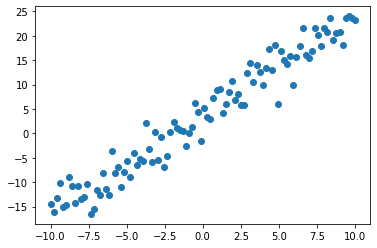

In [0]:
plt.scatter(y=dados.y, x=dados.x);

__Separar dados de treino e de teste__

In [0]:
X = np.array(dados.x)
y = np.array(dados.y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

__Instanciar e ajustar o modelo__

In [0]:
rl_BGD = Regr_lin_BGD(taxa_aprendizado=0.0005, n_iteracoes=30)
rl_BGD.fit(X_train, y_train)

UnboundLocalError: ignored

__Parâmetros do modelo__


In [0]:
print('Coeficiente linear (theta0): ', rl_BGD.intercept)
print('Coeficiente Angular (theta1): ', rl_BGD.coef[0])

Coeficiente linear (theta0):  2.8189828787877116
Coeficiente Angular (theta1):  1.9766117334973996


__Visualizar o modelo__

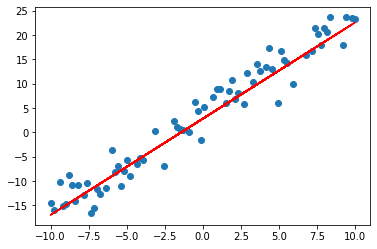

In [0]:
plt.scatter(X_train, y_train)
plt.plot(X_train, rl_BGD.predict(X_train), c='r');

__Visualizar o custo__

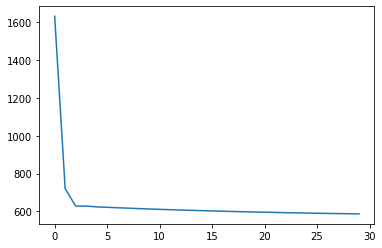

In [0]:
plt.plot(range(len(rl_BGD.custo)), rl_BGD.custo);

__Avaliação do modelo__

Viés - erro do modelo

In [0]:
y_hat_vi = rl_BGD.predict(X_train)

print('Erro absoluto médio', np.absolute((y_hat_vi - y_train)).mean())
print('Erro quadrático médio', ((y_hat_vi - y_train)**2).mean())

Erro absoluto médio 2.3318252013981278
Erro quadrático médio 8.384661191109606


Variância - erro de generalização

In [0]:
y_hat_va = rl_BGD.predict(X_test)

print('Erro absoluto médio', np.absolute((y_hat_va - y_test)).mean())
print('Erro quadrático médio', ((y_hat_va - y_test)**2).mean())

Erro absoluto médio 2.1361270229991933
Erro quadrático médio 7.6231399969336335


# Regressão linear usando pacote

__Singular Value Decomposition (SVD)__

__Pacotes utilizados__

* `pandas`: para criação e manipulação de banco de dados
* `numpy`: para trabalhar com algebra linear
* `matplotlib`: para plotar gráficos
* `train_test_split`: para selecionar parte do dataset
* `LinearRegression`: Para ajuste do modelo

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
np.random.seed(42) # para manter os mesmos resultados

__Criando dados para o ajuste do modelo__

In [0]:
dados = pd.DataFrame()
dados['x'] = np.linspace(-10, 10, 100)
dados['y'] = 4 + 2*dados.x + np.random.normal(0, 3, 100)

__Visualizando o modelo__

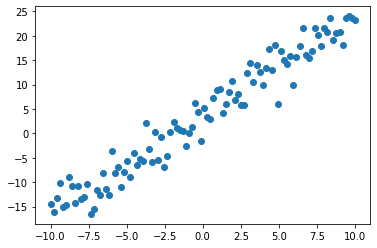

In [0]:
plt.scatter(y=dados.y, x=dados.x);

__Separar dados de treino e de teste__

In [0]:
X = np.array(dados.x)
y = np.array(dados.y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

__Colocando os valores no padrão__

In [0]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

__Instanciar e ajustar o modelo__

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Parâmetros do modelo__

In [0]:
print('Coeficiente linear (theta0): ', lin_reg.intercept_)
print('Coeficiente Angular (theta1): ', lin_reg.coef_[0])

Coeficiente linear (theta0):  3.7686949515092785
Coeficiente Angular (theta1):  2.0172049833575336


__Visualizar o modelo__

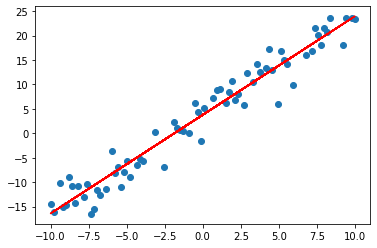

In [0]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='r');

__Avaliação do modelo__

Viés - erro do modelo

In [0]:
y_hat_vi = lin_reg.predict(X_train)

print('Erro absoluto médio', np.absolute((y_hat_vi - y_train)).mean())
print('Erro quadrático médio', ((y_hat_vi - y_train)**2).mean())

Erro absoluto médio 2.1238409871769637
Erro quadrático médio 7.453582599110228


Varância - erro de generalização

In [0]:
y_hat_va = lin_reg.predict(X_test)

print('Erro absoluto médio', np.absolute((y_hat_va - y_test)).mean())
print('Erro quadrático médio', ((y_hat_va - y_test)**2).mean())

Erro absoluto médio 2.2022585971701516
Erro quadrático médio 7.078283925348871


In [0]:
lin_reg.score(X_train, y_train)

0.9509180516975868

In [0]:
lin_reg.score(X_test, y_test)

0.9452202900792298

# Regressão linear usando pacote

__Stochastic Gradient Descent (SGD)__

__Pacotes utilizados__

* `pandas`: para criação e manipulação de banco de dados
* `numpy`: para trabalhar com algebra linear
* `matplotlib`: para plotar gráficos
* `train_test_split`: para selecionar parte do dataset
* `SGDRegressor`: Para ajuste do modelo

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
np.random.seed(42) # para manter os mesmos resultados

__Criando dados para o ajuste do modelo__

In [0]:
dados = pd.DataFrame()
dados['x'] = np.linspace(-10, 10, 100)
dados['y'] = 4 + 2*dados.x + np.random.normal(0, 3, 100)

__Visualizando o modelo__

In [0]:
plt.scatter(y=dados.y, x=dados.x);

__Separar dados de treino e de teste__

In [0]:
X = np.array(dados.x)
y = np.array(dados.y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

__Colocando os valores no padrão__

In [0]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

__Instanciar e ajustar o modelo__

In [0]:
sgd_reg = SGDRegressor(verbose=0)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

__Parâmetros do modelo__

In [0]:
print('Coeficiente linear (theta0): ', sgd_reg.intercept_[0])
print('Coeficiente Angular (theta1): ', sgd_reg.coef_[0])

Coeficiente linear (theta0):  3.738480374714461
Coeficiente Angular (theta1):  2.0863375773500223


__Visualizar o modelo__

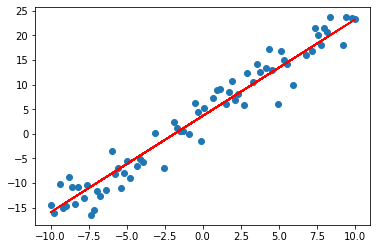

In [0]:
plt.scatter(X_train, y_train)
plt.plot(X_train, sgd_reg.predict(X_train), c='r');

__Avaliação do modelo__

Viés - erro do modelo

In [0]:
y_hat_vi = sgd_reg.predict(X_train)

print('Erro absoluto médio', np.absolute((y_hat_vi - y_train)).mean())
print('Erro quadrático médio', ((y_hat_vi - y_train)**2).mean())

Erro absoluto médio 2.1956455236315846
Erro quadrático médio 7.592768387968396


Variância - erro de generalização

In [0]:
y_hat_va = sgd_reg.predict(X_test)

print('Erro absoluto médio', np.absolute((y_hat_va - y_test)).mean())
print('Erro quadrático médio', ((y_hat_va - y_test)**2).mean())

Erro absoluto médio 2.1436723515326532
Erro quadrático médio 7.192175183660999


---------------